In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from imp import reload
import sys
import scipy.special as sp

sys.path.append('../')
import mg_si
from mg_si import plot as mplt
reload(mg_si)
reload(mg_si.planet)
reload(mg_si.core)
reload(mplt)

<module 'mg_si.plot' from '../mg_si/plot.py'>

In [55]:
X_Mg_0 = .04
X_Si_0 = .05
X_O_0 = 0.05
X_Fe = 1-X_Mg_0-X_Si_0-X_O_0
wtp = pl.reactions.core.M2wtp(np.array([X_Mg_0,X_Si_0, X_Fe,X_O_0]))*100
['{:.1f}'.format(x) for x in wtp]

['1.9', '2.7', '93.8', '1.6']

In [36]:
times = np.linspace(0,4568e6*365.25*24*3600,10000)
T_cmb0 = 5300
layer_thickness = 100 # m
overturn = 600 # Myr

times = np.linspace(0,4568e6*365.25*24*3600,20000)
# X_Mg_0 = .02
# X_Si_0 = .1
# X_O_0 = .05
X_Mg_0 = .001
X_Si_0 = .10
X_O_0 = 0.15

## background mantle state
MgNumFp = 0.8
MgNumPv = 0.93
X_MgFeO_b = 0.311
X_SiO2_b = 0.015
## Mantle viscosity
pl = mg_si.planet.Custom()
nu_present = 10**21/pl.params.mantle.rho #[m^2/s]


pl = mg_si.planet.Custom()
pl.reactions._set_layer_thickness(layer_thickness)
pl.reactions._set_overturn_time(overturn)
deltaT0 = pl.mantle_layer.get_dT0(T_cmb0)
T_um0 = T_cmb0-deltaT0

Moles_0 = pl.reactions.compute_Moles_0(X_Mg_0, X_Si_0, X_O_0, T_cmb0)
x0 = [T_cmb0, T_um0]
x0 = x0+Moles_0
pl.params.reactions.Moles_0 = Moles_0

Mm_b = pl.reactions.mantle.compute_Mm_b(X_MgFeO=X_MgFeO_b, X_SiO2=X_SiO2_b, MgNumFp=MgNumFp, MgNumPv=MgNumPv)
pl.params.reactions.Mm_b = Mm_b

T_present = 1350 # [K]
nu_old =  nu_present/1e3
T_old = T_um0
A,nu0 = pl.mantle_layer.find_arrenhius_params(nu_present, T_present, nu_old, T_old, set_values=True)
pl.reactions.core.M2wtp(np.array(Moles_0[:4]))*100

array([5.16460985e-02, 5.96793458e+00, 8.88808107e+01, 5.09960865e+00])

In [37]:
solution = pl.integrate(times, x0)

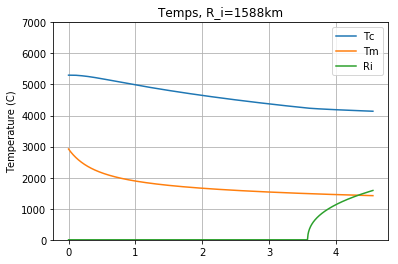

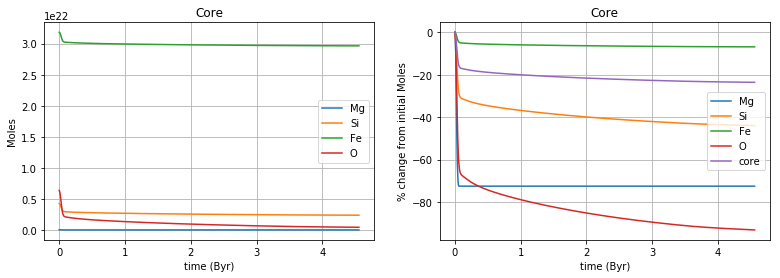

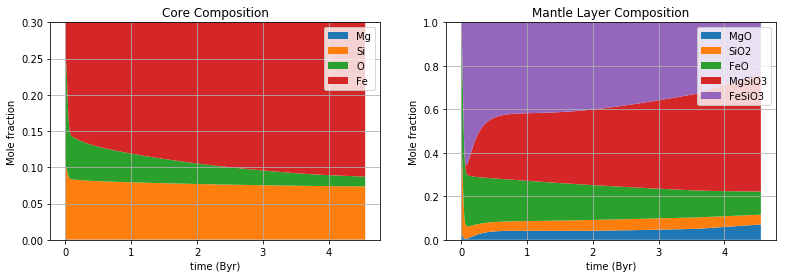

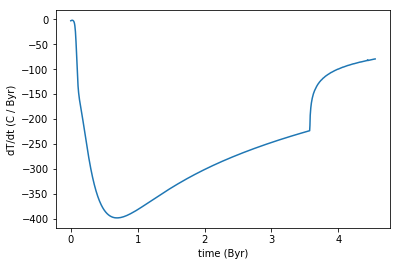

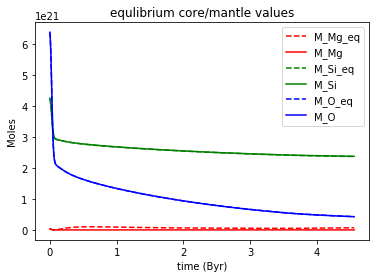

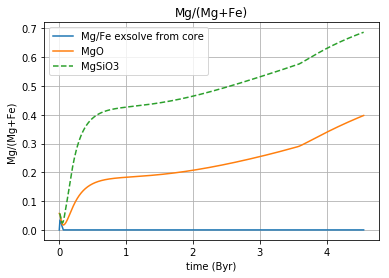

<Figure size 432x288 with 0 Axes>

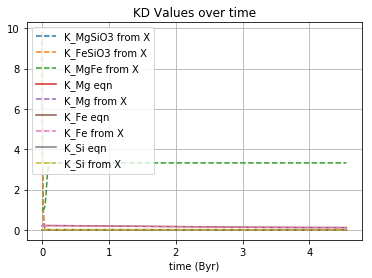

In [38]:
mplt.temperature(pl, times, solution, savename=None)
mplt.coremoles(pl, times, solution, savename=None)
mplt.composition(pl, times, solution, savename=None)
mplt.dTdt(pl, times, solution, savename=None)
mplt.MgSiOequilibrium(pl, times, solution, savename=None)
mplt.MgFefraction(pl, times, solution, savename=None)
mplt.K_vals(pl, times, solution, savename=None)


In [39]:
t_plt, all_parameters = pl.core_layer.compute_all_parameters(times, solution)

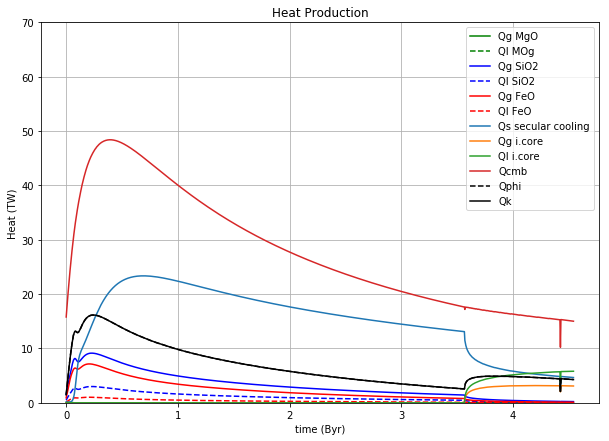

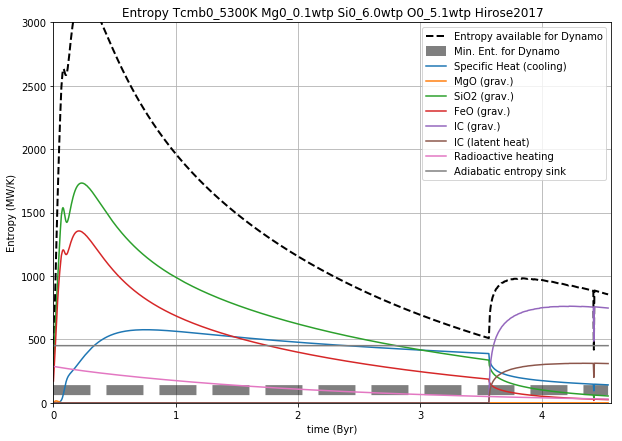

In [41]:
mplt.Q_all(pl, t_plt, all_parameters, savename=None)

wtp0 = pl.reactions.core.M2wtp(np.array(Moles_0[:4]))*100
title = 'Entropy Tcmb0_{:.0f}K Mg0_{:.1f}wtp Si0_{:.1f}wtp O0_{:.1f}wtp Hirose2017'.format(T_cmb0,wtp0[0],wtp0[1],wtp0[3])
mplt.E_all(pl, t_plt, all_parameters, savename=None)
plt.title(title)
# plt.ylim(0,1500)
plt.savefig(title+'.pdf')

0